# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Teuku Muhammad Rafif Alwafi
- **Email:** tmrafifalwafi@gmail.com
- **ID Dicoding:** rafifalwafi

## Menentukan Pertanyaan Bisnis

- Bagaimana persebaran pelanggan yang dimiliki Olist berdasarkan kota dan negara bagian?
- Bagaimana persebaran penjual yang dimiliki Olist berdasarkan kota dan negara bagian? Serta penjual manakah yang paling banyak mendapatkan order dan paling banyak menghasilkan revenue?
- Produk apa yang paling banyak dan paling sedikit terjual dan menghasilkan revenue?
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Bagaimana segmentasi pelanggan berdasarkan order terakhir (<em>Recency</em>), frekuensi order (<em>Frequency</em>), dan jumlah revenue yang dihasilkan (<em>Monetary</em>)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
# load customers dataset
customers_df = pd.read_csv('data/olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# load order items dataset
order_items_df = pd.read_csv('data/olist_order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
# load order payments dataset
order_pay_df = pd.read_csv('data/olist_order_payments_dataset.csv')
order_pay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
# load orders dataset
orders_df = pd.read_csv('data/olist_orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
# load products dataset
products_df = pd.read_csv('data/olist_products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
# load product translation dataset
product_translation_df = pd.read_csv('data/product_category_name_translation.csv')
product_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
# load sellers dataset
sellers_df = pd.read_csv('data/olist_sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Customers Dataset

In [9]:
# information about dataset
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Berdasarkan hasil, tidak ditemukan adanya <em>missing values</em> pada dataset `customers_df`. Namun tipe data kolom `customer_zip_code_prefix` perlu diubah menjadi `object`. 

In [10]:
# check duplicated data
print('Jumlah duplikasi data:', customers_df.duplicated().sum())

customers_df.describe(include='all')

Jumlah duplikasi data: 0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Nama kota tidak menggunakan huruf kapital dan nama negara bagian masih disingkat. Terdapat <strong>96096 customer</strong> yang telah melakukan pembelian di Olist yang tersebar di <strong>4119 kota</strong>.

#### Order Items Dataset

In [11]:
# information about dataset
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Tidak terdapat <em>missing values</em> pada dataset `order_items_df`. Tipe data `shipping_limit_date` perlu diubah menjadi `datetime`.

In [12]:
# check duplicated data
print('Jumlah duplikasi data:', order_items_df.duplicated().sum())

order_items_df.describe(include='all')

Jumlah duplikasi data: 0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


#### Order Payments Dataset

In [13]:
# information about dataset
order_pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Tidak terdapat <em>missing values</em> pada dataset `order_pay_df`.

In [14]:
# check duplicated data
print('Jumlah duplikasi data:', order_pay_df.duplicated().sum())

order_pay_df.describe(include='all')

Jumlah duplikasi data: 0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


#### Orders Dataset

In [15]:
# information about dataset
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [16]:
# count missing values
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Ditemukan adanya <em>missing values</em> pada kolom `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_approved_at`. Namun kolom-kolom tersebut tidak akan diubah karena pada saat analisis nilai yang tidak ada akan diisi dengan ekstrapolasi. Selain itu, terdapat beberapa kolom yang perlu diubah tipe datanya menjadi `datetime`.

In [17]:
# check duplicated data
print('Jumlah duplikasi data:', orders_df.duplicated().sum())

orders_df.describe(include='all')

Jumlah duplikasi data: 0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Products Dataset

In [18]:
# information about dataset
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [19]:
# count missing values
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat <em>missing values</em> pada kolom `product_category_name`. Kolom lain selain `product_id` dan `product_category_name` akan dihapus karena tidak akan dianalisis lebih lanjut.

In [20]:
# information about dataset
product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [21]:
# merge 'products_df' and its translation dataset
products_translated_df = pd.merge(products_df, product_translation_df, on='product_category_name', how='outer')

# information about dataset
products_translated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


Ditemukan adanya <em>missing values</em> pada dataset `products_translated_df`.

In [22]:
# count missing values
products_translated_df.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [23]:
# check duplicated data
print('Jumlah duplikasi data:', products_translated_df.duplicated().sum())

products_translated_df.describe(include='all')

Jumlah duplikasi data: 0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000,32328
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728,NaN
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047,NaN
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,NaN


#### Sellers Dataset

In [24]:
# information about dataset
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Tidak terdapat <em>missing values</em> pada dataset `sellers_df`.

In [25]:
# check duplicated data
print('Jumlah duplikasi data:', sellers_df.duplicated().sum())

sellers_df.describe(include='all')

Jumlah duplikasi data: 0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Nama kota tidak menggunakan huruf kapital dan nama negara bagian masih disingkat.

#### Summary

- Customers Dataset: Tipe data pada kolom `customer_zip_code_prefix` perlu diubah menjadi `object`. Nama kota tidak menggunakan huruf kapital dan nama negara bagian masih disingkat.
- Order Items Dataset: Tipe data `shipping_limit_date` perlu diubah menjadi `datetime`.
- Orders Dataset: Terdapat beberapa kolom yang perlu diubah tipe datanya menjadi `datetime`.
- Products Dataset: Terdapat <em>missing values</em> pada kolom `product_category_name` dan `product_category_name_english`. Kolom lain selain `product_id` dan `product_category_name_english` akan dihapus. Nama kategori produk masih menggunakan <em>underscore</em>.
- Sellers Dataset: Nama kota tidak menggunakan huruf kapital dan nama negara bagian masih disingkat.

### Cleaning Data

#### Cleaning Customers Dataset

In [26]:
# change "customer_zip_code_prefix" dtype
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype(str)
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [27]:
# helper function to capitalized each word in city name
def capitalize_city(city):
    word_list = [word.capitalize() if word not in "da|de|do|das|dos" else word for word in city.split()]
    return ' '.join(word_list)

# capitalized each word in city name
customers_df['customer_city'] = customers_df['customer_city'].apply(lambda city: capitalize_city(city))

customers_df['customer_city'].unique()

array(['Franca', 'Sao Bernardo do Campo', 'Sao Paulo', ...,
       'Monte Bonito', 'Sao Rafael', 'Eugenio de Castro'], dtype=object)

Singkatan-singkatan negara bagian di Brazil beserta kepanjangannya diambil dari laman https://www.drupal.org/node/2559551.

In [28]:
# dictionary of state abbreviations
state_name = {
    "AC" : "Acre",
    "AL" : "Alagoas",
    "AM" : "Amazonas",
    "AP" : "Amapa",
    "BA" : "Bahia",
    "CE" : "Ceara",
    "DF" : "Distrito Federal",
    "ES" : "Espirito Santo",
    "GO" : "Goias",
    "MA" : "Maranhao",
    "MG" : "Minas Gerais",
    "MS" : "Mato Grosso do Sul",
    "MT" : "Mato Grosso",
    "PA" : "Para",
    "PB" : "Paraiba",
    "PE" : "Pernambuco",
    "PI" : "Piaui",
    "PR" : "Parana",
    "RJ" : "Rio de Janeiro",
    "RN" : "Rio Grande do Norte",
    "RO" : "Rondonia",
    "RR" : "Roraima",
    "RS" : "Rio Grande do Sul",
    "SC" : "Santa Catarina",
    "SE" : "Sergipe",
    "SP" : "Sao Paulo",
    "TO" : "Tocantins"}

# change 'customer_state' values
customers_df = customers_df.replace({'customer_state': state_name})

customers_df['customer_state'].unique()

array(['Sao Paulo', 'Santa Catarina', 'Minas Gerais', 'Parana',
       'Rio de Janeiro', 'Rio Grande do Sul', 'Para', 'Goias',
       'Espirito Santo', 'Bahia', 'Maranhao', 'Mato Grosso do Sul',
       'Ceara', 'Distrito Federal', 'Rio Grande do Norte', 'Pernambuco',
       'Mato Grosso', 'Amazonas', 'Amapa', 'Alagoas', 'Rondonia',
       'Paraiba', 'Tocantins', 'Piaui', 'Acre', 'Sergipe', 'Roraima'],
      dtype=object)

#### Cleaning Order Items Dataset

In [29]:
# change "shipping_limit_date" dtype
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Cleaning Orders Dataset

In [30]:
# datetime columns
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                    'order_delivered_customer_date', 'order_estimated_delivery_date']

# convert dtype to "datetime"
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column], format='%Y-%m-%d %H:%M:%S')
    
# check data types
display(orders_df.head())
orders_df.info()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Cleaning Products Dataset

Berdasarkan hasil di atas, kolom `product_category_name` memiliki 73 <em>unique values</em>, sedangkan kolom `product_category_name_english` hanya 71. Hal ini diperkirakan karena terdapat kategori produk yang belum diterjemahkan ke dalam Bahasa Inggris baik disebabkan karena <em>missing values</em> maupun tidak ada terjemahannya pada dataset `product_translation_df`
. Berikut unique value pada `product_category_name` yang kosong  

In [31]:
# untranslated product categories
products_translated_df[products_translated_df['product_category_name_english'].isna()]['product_category_name'].unique()

array([nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
      dtype=object)

Ketegori produk `pc_gamer` dan `portateis_cozinha_e_preparadores_de_alimentos` belum/tidak diterjemahkan ke Bahasa Inggris. Untuk `pc_gamer` akan diisikan ke dalam kolom `product_category_name_english`, sedangkan `portateis_cozinha_e_preparadores_de_alimentos` dan <em>missing values<em>  akan diisi dengan nilai `uncategorized`.

In [32]:
# fill 'pc_gamer' value in 'product_category_name_english' 
mask = products_translated_df['product_category_name'] == 'pc_gamer'
products_translated_df['product_category_name_english'] = products_translated_df['product_category_name_english'].mask(mask, 'pc_gamer')

# assign nan and 'portateis_cozinha_e_preparadores_de_alimentos' as 'uncategorized'
products_translated_df['product_category_name'].fillna('uncategorized', inplace=True)
products_translated_df['product_category_name_english'].fillna('uncategorized', inplace=True)

# drop unnecessary columns
drop_cols = [col for col in products_translated_df if col not in ['product_id', 'product_category_name_english']]
products_translated_df.drop(drop_cols, axis='columns', inplace=True)

# check missing value
products_translated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32951 non-null  object
 1   product_category_name_english  32951 non-null  object
dtypes: object(2)
memory usage: 772.3+ KB


In [33]:
# remove "_" and capitalize each category name
products_translated_df = products_translated_df.rename(
    columns={'product_category_name_english': 'product_category'})

products_translated_df['product_category'] = products_translated_df['product_category'].apply(
    lambda cat: ' '.join([word.capitalize() if word.lower() != 'and' else word for word in cat.split('_')]))

products_translated_df['product_category'].unique()


array(['Perfumery', 'Art', 'Sports Leisure', 'Baby', 'Housewares',
       'Musical Instruments', 'Cool Stuff', 'Furniture Decor',
       'Home Appliances', 'Toys', 'Bed Bath Table',
       'Construction Tools Safety', 'Computers Accessories',
       'Health Beauty', 'Luggage Accessories', 'Garden Tools',
       'Office Furniture', 'Auto', 'Electronics', 'Fashion Shoes',
       'Telephony', 'Stationery', 'Fashion Bags Accessories', 'Computers',
       'Home Construction', 'Watches Gifts',
       'Construction Tools Construction', 'Pet Shop', 'Small Appliances',
       'Agro Industry and Commerce', 'Uncategorized',
       'Furniture Living Room', 'Signaling and Security',
       'Air Conditioning', 'Consoles Games', 'Books General Interest',
       'Costruction Tools Tools', 'Fashion Underwear Beach',
       'Fashion Male Clothing', 'Kitchen Dining Laundry Garden Furniture',
       'Industry Commerce and Business', 'Fixed Telephony',
       'Construction Tools Lights', 'Books Technical',

#### Cleaning Sellers Dataset

In [34]:
# capitalized each word in city name
sellers_df['seller_city'] = sellers_df['seller_city'].apply(lambda city: capitalize_city(city))

sellers_df['seller_city'].head(8)

0             Campinas
1           Mogi Guacu
2       Rio de Janeiro
3            Sao Paulo
4    Braganca Paulista
5       Rio de Janeiro
6               Brejao
7            Penapolis
Name: seller_city, dtype: object

In [35]:
# change 'seller_state' values
sellers_df = sellers_df.replace({'seller_state': state_name})

sellers_df['seller_state'].unique()

array(['Sao Paulo', 'Rio de Janeiro', 'Pernambuco', 'Parana', 'Goias',
       'Santa Catarina', 'Bahia', 'Distrito Federal', 'Rio Grande do Sul',
       'Minas Gerais', 'Rio Grande do Norte', 'Mato Grosso', 'Ceara',
       'Paraiba', 'Acre', 'Espirito Santo', 'Rondonia', 'Piaui',
       'Mato Grosso do Sul', 'Sergipe', 'Maranhao', 'Amazonas', 'Para'],
      dtype=object)

## Exploratory Data Analysis (EDA)

### Explore Customers Dataset

#### Customers Distribution

In [36]:
# top 10 cities by number of unique customers
customers_df.groupby('customer_city')['customer_unique_id'].nunique().sort_values(ascending=False).head(10)

customer_city
Sao Paulo                14984
Rio de Janeiro            6620
Belo Horizonte            2672
Brasilia                  2069
Curitiba                  1465
Campinas                  1398
Porto Alegre              1326
Salvador                  1209
Guarulhos                 1153
Sao Bernardo do Campo      908
Name: customer_unique_id, dtype: int64

Kota dengan pelanggan terbanyak adalah <strong>Sao Paulo</strong>, yaitu sebanyak 14984 pelanggan. Kemudian diikuti oleh Rio de Janeiro (6620 pelanggan) dan Belo Horizonte (2672 pelanggan).

In [37]:
# top 10 states by number of unique customers
customers_df.groupby('customer_state')['customer_unique_id'].nunique().sort_values(ascending=False).head(10)

customer_state
Sao Paulo            40302
Rio de Janeiro       12384
Minas Gerais         11259
Rio Grande do Sul     5277
Parana                4882
Santa Catarina        3534
Bahia                 3277
Distrito Federal      2075
Espirito Santo        1964
Goias                 1952
Name: customer_unique_id, dtype: int64

<strong>Sao Paulo</strong> merupakan negara bagian dengan pelanggan terbanyak, yaitu sebanyak 40302 pelanggan. Kemudian diikuti oleh Rio de Janeiro (12384 pelanggan) dan Minas Gerais (11259 pelanggan).

In [38]:
# top 10 zipcode by number of unique customers
customers_df.groupby('customer_zip_code_prefix')['customer_unique_id'].nunique().sort_values(ascending=False).head(10)

customer_zip_code_prefix
22790    136
22793    119
24220    114
24230    113
22775    107
29101    100
13212     92
35162     91
22631     87
38400     86
Name: customer_unique_id, dtype: int64

Pelanggan paling banyak berada di kodepos 22790.

### Explore Order Items Dataset

Berdasarkan deskripsi dataset yang diberikan, total nilai setiap ordernya adalah:\
`total_order_value` = `total_order_item_value` + `total_freight_value`

In [39]:
# calculate total_order_value
order_items_byorderid_df = order_items_df.groupby('order_id').agg(
    item_count=('order_id', 'count'),
    item_nunique=('product_id', 'nunique'),
    total_order_item_value=('price', 'sum'),
    total_freight_value=('freight_value', 'sum')
)

order_items_byorderid_df['total_order_value'] = order_items_byorderid_df['total_order_item_value'] + order_items_byorderid_df['total_freight_value']
order_items_byorderid_df.describe(include='all')

,item_count,item_nunique,total_order_item_value,total_freight_value,total_order_value
count,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000
mean,1.141731,1.038098,137.754076,22.823562,160.577638
std,0.538452,0.226456,210.645145,21.650909,220.466087
min,1.000000,1.000000,0.850000,0.000000,9.590000
25%,1.000000,1.000000,45.900000,13.850000,61.980000
50%,1.000000,1.000000,86.900000,17.170000,105.290000
75%,1.000000,1.000000,149.900000,24.040000,176.870000
max,21.000000,8.000000,13440.000000,1794.960000,13664.080000


Nilai `total_order_value` setiap order yang dilakukan berada pada rentang 9,59 hingga 13664,08 dengan nilai rata-rata sebesar 160,57.

### Explore Order Payments Dataset

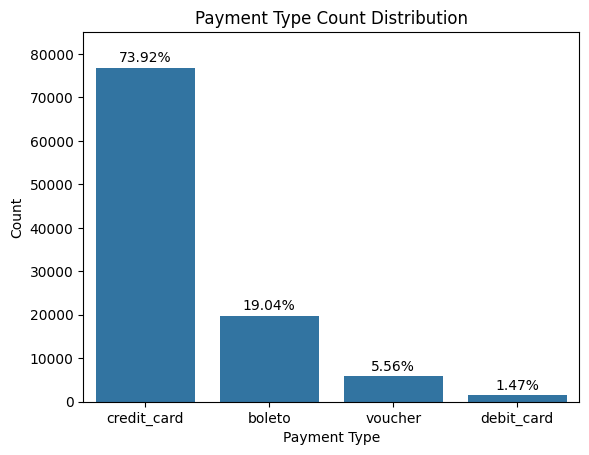

In [40]:
# payment type distribution
ax = sns.countplot(
    data=order_pay_df[order_pay_df['payment_type'] != 'not_defined'],
    x='payment_type')

ax.set_title('Payment Type Count Distribution')
ax.set_xlabel('Payment Type')
ax.set_ylabel('Count')
ax.set_ylim(0, 85000)
ax.bar_label(
    container=ax.containers[0],
    padding=2,
    fmt=lambda x: f'{x/len(order_pay_df)*100:.2f}%')

plt.show()

Diketahui bahwa jenis pembayaran yang paling banyak digunakan adalah "credit_card", yaitu sekitar 74% dari seluruh penjualan. Jenis pembayaran kedua yang paling umum adalah "boleto" (tiket), yaitu sebanyak 19% penjualan. Jenis pembayaran paling umum selanjutnya adalah "voucher", yaitu sebesar 5,5%. Terdapat juga pembayaran dengan jenis "debit_card" dan 3 data dengan jenis pembayaran "not_defined". 

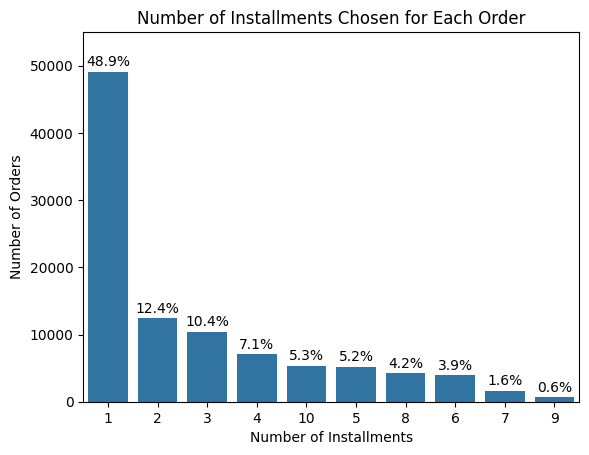

In [41]:
# payment installment count distribution
pay_installments_df = order_pay_df.groupby('payment_installments').agg(
    order_nunique=('order_id', 'nunique')).reset_index()
pay_installments_df = pay_installments_df.astype({'payment_installments': 'string'})

ax = sns.barplot(
    data=pay_installments_df.sort_values('order_nunique', ascending=False).head(10),
    x='payment_installments',
    y='order_nunique')

ax.set_title('Number of Installments Chosen for Each Order')
ax.set_xlabel('Number of Installments')
ax.set_ylabel('Number of Orders')
ax.set_ylim(0, 55000)
ax.bar_label(
    container=ax.containers[0],
    padding=2,
    fmt=lambda x: f'{x / pay_installments_df.order_nunique.sum() *100:.1f}%')

plt.show()

Dari hasil ini diketahui bahwa mayoritas pelanggan lebih menyukai pembayaran tunggal untuk setiap ordernya.

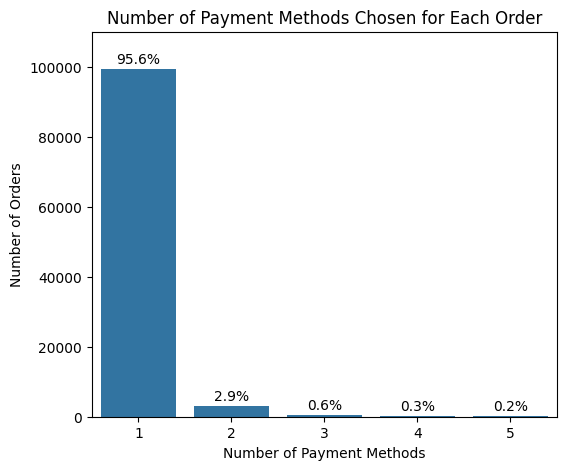

In [42]:
# payment sequential count distribution
pay_sequential_df = order_pay_df.groupby('payment_sequential').agg(
    order_nunique=('order_id', 'nunique')).reset_index()

plt.subplots(figsize=(6, 5))
ax = sns.barplot(
    data=pay_sequential_df.sort_values('order_nunique', ascending=False).head(),
    x='payment_sequential',
    y='order_nunique')

ax.set_title('Number of Payment Methods Chosen for Each Order'),
ax.set_xlabel('Number of Payment Methods')
ax.set_ylabel('Number of Orders')
ax.set_ylim(0, 110000)
ax.bar_label(
    container=ax.containers[0],
    padding=2,
    fmt=lambda x: f'{x / pay_sequential_df.order_nunique.sum() *100:.1f}%')

plt.show()

Berdasarkan hasil diketahui bahwa mayoritas pelanggan hanya memilih satu metode pembayaran setiap ordernya.

### Explore Orders Dataset

In [43]:
# order status distribution
orders_df['order_status'].value_counts(normalize=True)*100

delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: order_status, dtype: float64

Sebanyak 97% dari seluruh order telah terkirim (delivered), sedangkan 1,1%-nya sedang dikirim (shipped).

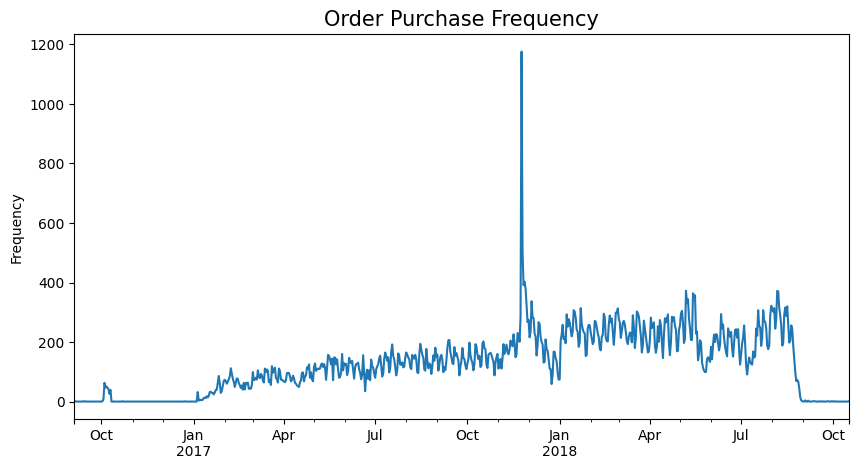

In [44]:
# order purchase frequency
plt.subplots(figsize=(10, 5))
orders_df.resample('D', on='order_purchase_timestamp').size().plot(kind='line', linestyle='-')

plt.title('Order Purchase Frequency', fontsize=15)
plt.xlabel(None)
plt.ylabel('Frequency')

plt.show()

Jumlah pembelian memuncak pada pertengahan November sampai Desember 2017.

### Explore Products Dataset

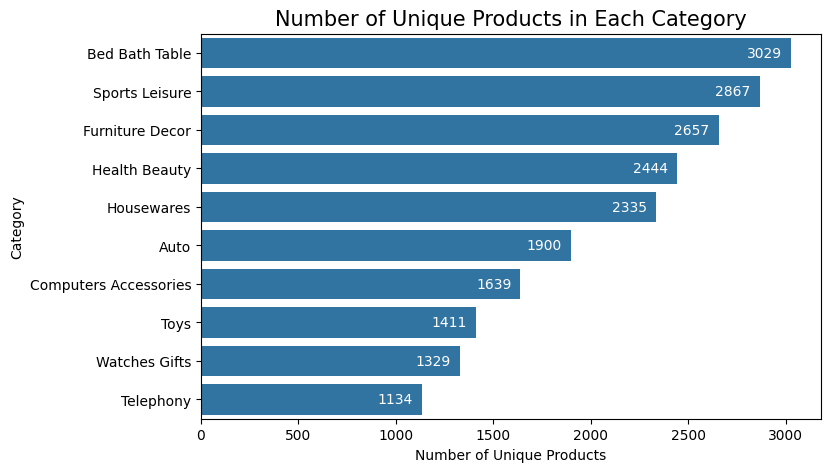

In [45]:
# unique products in each category
plt.subplots(figsize=(8, 5))
ax = sns.barplot(
    data=products_translated_df.groupby('product_category').agg(
            product_count=('product_id', 'nunique')
            ).sort_values('product_count', ascending=False).reset_index().head(10),
    y='product_category',
    x='product_count'
)

# display values
ax.bar_label(ax.containers[0], padding=-32, color='white')

plt.title('Number of Unique Products in Each Category', fontsize=15)
plt.xlabel('Number of Unique Products')
plt.ylabel('Category')

plt.show()

Kategori barang dengan produk terbanyak adalah Bed Bath Table, yaitu sebanyak 3029 produk. Selanjutnya diikuti oleh Sport Leissure dan Furniture Decor, yaitu sebanyak 2867 dan 2657 produk berturut-turut.

### Explore Sellers Dataset

In [46]:
# top 10 cities by number of unique customers
sellers_df.groupby('seller_city')['seller_id'].nunique().sort_values(ascending=False).head(10)

seller_city
Sao Paulo         695
Curitiba          127
Rio de Janeiro     96
Belo Horizonte     68
Ribeirao Preto     52
Guarulhos          50
Ibitinga           49
Santo Andre        45
Campinas           41
Maringa            40
Name: seller_id, dtype: int64

Kota dengan penjual terbanyak berada di Sao Paulo, yaitu sebanyak 698 penjual. Diikuti oleh Kota Curitiba (127 penjual) dan Rio de Janeiro (96 penjual).

In [47]:
# top 10 states by number of sellers
sellers_df.groupby('seller_state')['seller_id'].nunique().sort_values(ascending=False).head(10)

seller_state
Sao Paulo            1849
Parana                349
Minas Gerais          244
Santa Catarina        190
Rio de Janeiro        171
Rio Grande do Sul     129
Goias                  40
Distrito Federal       30
Espirito Santo         23
Bahia                  19
Name: seller_id, dtype: int64

Negara bagian dengan penjual terbanyak berada di Sao Paulo, yaitu sebanyak 1849 penjual. Diikuti oleh Parana (349 penjual) dan Minas Gerais (244 penjual).

### Explore `product_order_df`

In [48]:
# merge 'product_df' and 'order_items_df'
product_order_df = pd.merge(products_translated_df, order_items_df, on='product_id', how='outer')
product_order_df

,product_id,product_category,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,6a2fb4dd53d2cdb88e0432f1284a004c,Perfumery,048cc42e03ca8d43c729adf6962cb348,1,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78
2,6a2fb4dd53d2cdb88e0432f1284a004c,Perfumery,5fa78e91b5cb84b6a8ccc42733f95742,1,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78
3,0d009643171aee696f4733340bc2fdd0,Perfumery,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,1,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13
4,0d009643171aee696f4733340bc2fdd0,Perfumery,7b13c77c64a9a956500cbf1a9a23798d,1,7178f9f4dd81dcef02f62acdf8151e01,2018-05-30 10:38:35,275.00,23.48
...,...,...,...,...,...,...,...,...
112645,1dceebcc5f23c02ea23e16d5bedca000,Cds Dvds Musicals,7ed69fbc79fbda50e09caa9c127026e5,1,4e922959ae960d389249c378d1c939f5,2018-05-02 11:54:43,65.00,52.58
112646,1dceebcc5f23c02ea23e16d5bedca000,Cds Dvds Musicals,9c782cb7854e5dfa91927cfca8949eb8,1,4e922959ae960d389249c378d1c939f5,2017-07-19 11:35:22,45.00,16.11
112647,1dceebcc5f23c02ea23e16d5bedca000,Cds Dvds Musicals,cea54c1853c864ab36cea3ef732d7191,1,4e922959ae960d389249c378d1c939f5,2017-11-14 11:50:17,65.00,9.94
112648,1dceebcc5f23c02ea23e16d5bedca000,Cds Dvds Musicals,d4e8d3bb5e3673ed68ac154fe86de946,1,4e922959ae960d389249c378d1c939f5,2017-11-03 11:29:30,45.00,16.11


In [49]:
# top products by number of orders
top_product_byorder_df = product_order_df.groupby('product_id')['order_id'].count().sort_values(ascending=False).head(10).reset_index(name='order_count')
pd.merge(top_product_byorder_df, products_translated_df, on='product_id')

,product_id,order_count,product_category
0,aca2eb7d00ea1a7b8ebd4e68314663af,527,Furniture Decor
1,99a4788cb24856965c36a24e339b6058,488,Bed Bath Table
2,422879e10f46682990de24d770e7f83d,484,Garden Tools
3,389d119b48cf3043d311335e499d9c6b,392,Garden Tools
4,368c6c730842d78016ad823897a372db,388,Garden Tools
5,53759a2ecddad2bb87a079a1f1519f73,373,Garden Tools
6,d1c427060a0f73f6b889a5c7c61f2ac4,343,Computers Accessories
7,53b36df67ebb7c41585e8d54d6772e08,323,Watches Gifts
8,154e7e31ebfa092203795c972e5804a6,281,Health Beauty
9,3dd2a17168ec895c781a9191c1e95ad7,274,Computers Accessories


Walaupun kategori produk yang paling banyak diorder adalah Bed Bath Table, produk yang paling banyak diorder merupakan produk dari kategori Furniture Decor.

### Explore `customer_payments_df`

In [50]:
# merge "order_pay_df", "orders_df", and "customers_df"
customer_payments_df = pd.merge(order_pay_df, orders_df, on='order_id', how='outer')
customer_payments_df = pd.merge(customer_payments_df, customers_df, on='customer_id', how='outer')
customer_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8.0,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,708ab75d2a007f0564aedd11139c7708,39801,Teofilo Otoni,Minas Gerais
1,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1.0,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,Sao Paulo,Sao Paulo
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1.0,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6f70c0b2f7552832ba46eb57b1c5651e,2652,Sao Paulo,Sao Paulo
3,ba78997921bbcdc1373bb41e913ab953,1.0,credit_card,8.0,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,87695ed086ebd36f20404c82d20fca87,36060,Juiz de Fora,Minas Gerais
4,42fdf880ba16b47b59251dd489d4441a,1.0,credit_card,2.0,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13,4291db0da71914754618cd789aebcd56,18570,Conchas,Sao Paulo


In [51]:
# top states by generating revenue
customer_payments_df.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False).head(10)

customer_city
Sao Paulo         2203373.09
Rio de Janeiro    1161927.36
Belo Horizonte     421765.12
Brasilia           354216.78
Curitiba           247392.48
Porto Alegre       224731.42
Salvador           218071.50
Campinas           216248.43
Guarulhos          165121.99
Niteroi            139996.99
Name: payment_value, dtype: float64

Kota yang paling banyak menghasilkan revenue adalah Sao Paulo, yaitu sebanyak R$2.203.373,09. Diikuti dengan Kota Rio de Janeiro (R$1.161.927,36) dan Kota Belo Horizonte (R$421.765,12).

In [52]:
# top states by generating revenue
customer_payments_df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).head(10)

customer_state
Sao Paulo            5998226.96
Rio de Janeiro       2144379.69
Minas Gerais         1872257.26
Rio Grande do Sul     890898.54
Parana                811156.38
Santa Catarina        623086.43
Bahia                 616645.82
Distrito Federal      355141.08
Goias                 350092.31
Espirito Santo        325967.55
Name: payment_value, dtype: float64

Negara bagian yang paling banyak menghasilkan revenue adalah Sao Paulo, dengan revenue sebesar R$5.998.226,96. Selanjutnya diikuti dengan Rio de Janeiro (R$2.144.379,69) dan Minas Gerais (R$1.872.257,26).

### Explore `main_df`

In [53]:
# merge all dataset
main_df = pd.merge(product_order_df, customer_payments_df, on='order_id', how='left')
main_df = pd.merge(main_df, sellers_df, on='seller_id', how='outer')

main_df.head()

,product_id,product_category,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1.0,debit_card,...,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,b1a1199364a4a7fe27c4486ab63f550d,13848,Mogi-guacu,Sao Paulo,3694,Sao Paulo,Sao Paulo
1,a035b83b3628decee6e3823924e0c10f,Perfumery,b18cb761efbe70da4838435a349abd07,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-07-06 19:31:03,268.38,21.07,1.0,credit_card,...,2018-07-05 13:21:00,2018-07-10 22:34:39,2018-07-27,fc68ba9c34778e17224154c255b5656e,84200,Jaguariaiva,Parana,3694,Sao Paulo,Sao Paulo
2,091107484dd7172f5dcfed173e4a960e,Perfumery,a7708ffa8966514c098d15e1abfa6417,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-27 19:31:35,7.65,10.55,1.0,credit_card,...,2018-04-24 16:22:36,2018-04-25 23:02:39,2018-05-15,c67329fd07872a68d6d6d1f1626a0760,3804,Sao Paulo,Sao Paulo,3694,Sao Paulo,Sao Paulo
3,ccac9976bafbf7e587bd2c29302e2314,Perfumery,206d1a13596872a713dba14504fdf699,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-08-01 16:35:17,268.38,18.07,1.0,credit_card,...,2018-08-01 15:24:00,2018-08-06 18:36:46,2018-08-15,1b6d2664b20a04a1fa9c900aedf29440,71920,Brasilia,Distrito Federal,3694,Sao Paulo,Sao Paulo
4,2eadf6089620e82047e4d24101dc6759,Perfumery,f8bb4d404d187c79b86ccf852dfa345e,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-06-20 21:58:24,16.88,7.39,1.0,credit_card,...,2018-06-19 15:10:00,2018-06-20 19:22:15,2018-06-28,ac13a41fc49bcb3bdcd86142b8ffc0f0,4560,Sao Paulo,Sao Paulo,3694,Sao Paulo,Sao Paulo


In [54]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117604 entries, 0 to 117603
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   product_id                     117604 non-null  object        
 1   product_category               117604 non-null  object        
 2   order_id                       117604 non-null  object        
 3   order_item_id                  117604 non-null  int64         
 4   seller_id                      117604 non-null  object        
 5   shipping_limit_date            117604 non-null  datetime64[ns]
 6   price                          117604 non-null  float64       
 7   freight_value                  117604 non-null  float64       
 8   payment_sequential             117601 non-null  float64       
 9   payment_type                   117601 non-null  object        
 10  payment_installments           117601 non-null  float64       
 11  

In [55]:
# top sellers by order count
main_df.groupby('seller_id').agg(
    order_count=('order_id', 'nunique'),
    revenue=('payment_value', 'sum')
).sort_values('order_count', ascending=False).head()

,order_count,revenue
seller_id,,
6560211a19b47992c3666cc44a7e94c0,1854,179657.75
4a3ca9315b744ce9f8e9374361493884,1806,301245.27
cc419e0650a3c5ba77189a1882b7556a,1706,141309.58
1f50f920176fa81dab994f9023523100,1404,290253.42
da8622b14eb17ae2831f4ac5b9dab84a,1314,272219.32


In [56]:
# top sellers by generating revenue
main_df.groupby('seller_id').agg(
    order_count=('order_id', 'nunique'),
    revenue=('payment_value', 'sum')
).sort_values('revenue', ascending=False).head()

,order_count,revenue
seller_id,,
7c67e1448b00f6e969d365cea6b010ab,982,507166.91
1025f0e2d44d7041d6cf58b6550e0bfa,915,308222.04
4a3ca9315b744ce9f8e9374361493884,1806,301245.27
1f50f920176fa81dab994f9023523100,1404,290253.42
53243585a1d6dc2643021fd1853d8905,358,284903.08


Penjual dengan ID 6560211a19b47992c3666cc44a7e94c0 mendapatkan order terbanyak, yaitu sebanyak 1854 kali. Sedangkan penjual dengan ID 7c67e1448b00f6e969d365cea6b010ab menghasilkan revenue paling besar, yaitu R$507.166,91.

### RFM Analysis

In [57]:
# create dataframe for RFM analysis
rfm_df = main_df.groupby('customer_unique_id').agg(
    max_order_timestamp=('order_purchase_timestamp', 'max'),
    frequency=('order_id', 'nunique'),
    monetary=('payment_value', 'sum')).reset_index()
rfm_df.head()

,customer_unique_id,max_order_timestamp,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,196.89


In [58]:
# calculate recency
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = main_df['order_purchase_timestamp'].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_unique_id,max_order_timestamp,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,141.90,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,27.19,119
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,86.22,542
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,43.62,326
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,196.89,293


In [59]:
# helper function to create RFM dataframe
def rfm_score(df):
    df = df.copy()
    
    # Calculate the rank
    df['r_score'] = df['recency'].rank(ascending=False)
    df['f_score'] = df['frequency'].rank(ascending=True)
    df['m_score'] = df['monetary'].rank(ascending=True)
    
    # normalizing the rank of the customers
    df['r_score_norm'] = (df['r_score']/df['r_score'].max())*100
    df['f_score_norm'] = (df['f_score']/df['f_score'].max())*100
    df['m_score_norm'] = (df['m_score']/df['m_score'].max())*100
    
    # Calculate the RFM score
    df['RFM_score'] = (0.2*df['r_score_norm'] + 0.3*df['f_score_norm'] + \
        0.5*df['m_score_norm']) * 0.05
    df = df.round(2)

    # Create segmentation
    df['customer_segment'] = pd.cut(
        x=df['RFM_score'],
        bins=[0, df["RFM_score"].quantile(0.25), df["RFM_score"].quantile(0.75), df["RFM_score"].quantile(0.90), 5.0],
        labels=['Low Value Customers', 'Medium Value Customers',
            'High Value Customers', 'Top Customers'])
        
    return df

rfm_df = rfm_score(rfm_df)
rfm_df.head()

,customer_unique_id,max_order_timestamp,frequency,monetary,recency,r_score,f_score,m_score,r_score_norm,f_score_norm,m_score_norm,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,141.90,116,72687.0,46254.0,57691.5,76.18,48.47,60.46,3.00,Medium Value Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,27.19,119,71708.0,46254.0,2069.5,75.15,48.47,2.17,1.53,Low Value Customers
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,86.22,542,3427.0,46254.0,36337.5,3.59,48.47,38.08,1.72,Low Value Customers
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,43.62,326,27472.5,46254.0,11552.0,28.79,48.47,12.11,1.32,Low Value Customers
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,196.89,293,32250.5,46254.0,70686.5,33.80,48.47,74.08,2.92,Medium Value Customers


In [60]:
rfm_df['customer_segment'].value_counts(normalize=True)*100

Medium Value Customers    49.782016
Low Value Customers       25.376231
High Value Customers      14.937120
Top Customers              9.904632
Name: customer_segment, dtype: float64

Kelompok `Top Customers` merupakan kelompok pelanggan dengan RFM score tertinggi (Top 10%), diikuti oleh `High Value Customers` (Top 25%) dan `Medium Value Customers` (Top 75%).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana persebaran pelanggan yang dimiliki Olist berdasarkan kota dan negara bagian?

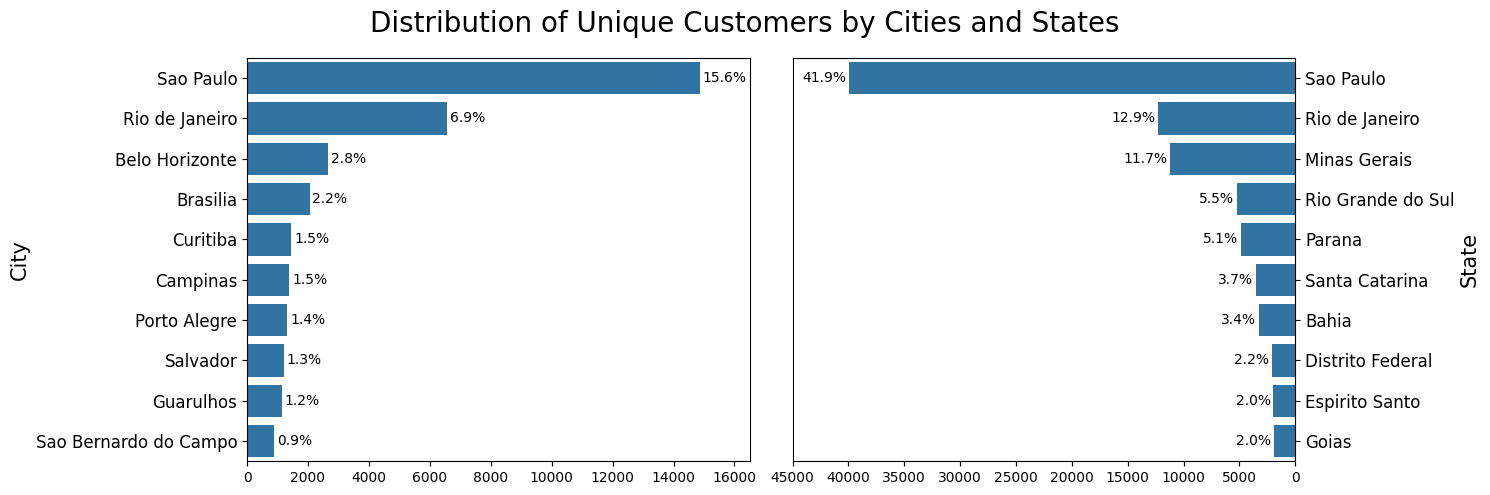

In [61]:
# customers distribution
customers_bycity_df = main_df.groupby('customer_city')['customer_unique_id'].nunique().reset_index()
customers_bystate_df = main_df.groupby('customer_state')['customer_unique_id'].nunique().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# by city
sns.barplot(
    data=customers_bycity_df.sort_values('customer_unique_id', ascending=False).head(10),
    x='customer_unique_id',
    y='customer_city',
    ax=ax[0])

ax[0].set_ylabel('City', fontsize=15)
ax[0].set_xlabel(None)
ax[0].set_xlim(0, 16500)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].bar_label(
    container=ax[0].containers[0],
    padding=2,
    fmt=lambda x: f'{x/customers_bycity_df.customer_unique_id.sum()*100:.1f}%')

# by state
sns.barplot(
    data=customers_bystate_df.sort_values('customer_unique_id', ascending=False).head(10),
    x='customer_unique_id',
    y='customer_state',
    ax=ax[1])

ax[1].set_ylabel('State', fontsize=15)
ax[1].set_xlabel(None)
ax[1].set_xlim(0, 45000)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=12)
ax[1].bar_label(
    container=ax[1].containers[0],
    padding=2,
    fmt=lambda x: f'{x/customers_bystate_df.customer_unique_id.sum()*100:.1f}%')

plt.suptitle("Distribution of Unique Customers by Cities and States", fontsize=20)
plt.tight_layout()
plt.show()

Kota dengan pelanggan paling banyak adalah Sao Paulo, yaitu sebanyak 15.6% dari seluruh pelanggan, dan diikuti oleh Rio de Janeiro (6.9%) dan Belo Horizonte (2.8%). Sedangkan negara bagian dengan pelanggan terbanyak berada di Sao Paulo, yaitu sebanyak 41.9% dari seluruh pelanggan, selanjutnya diikuti oleh Rio de Janeiro (12.9%) dan Minas Gerais (11.7%).

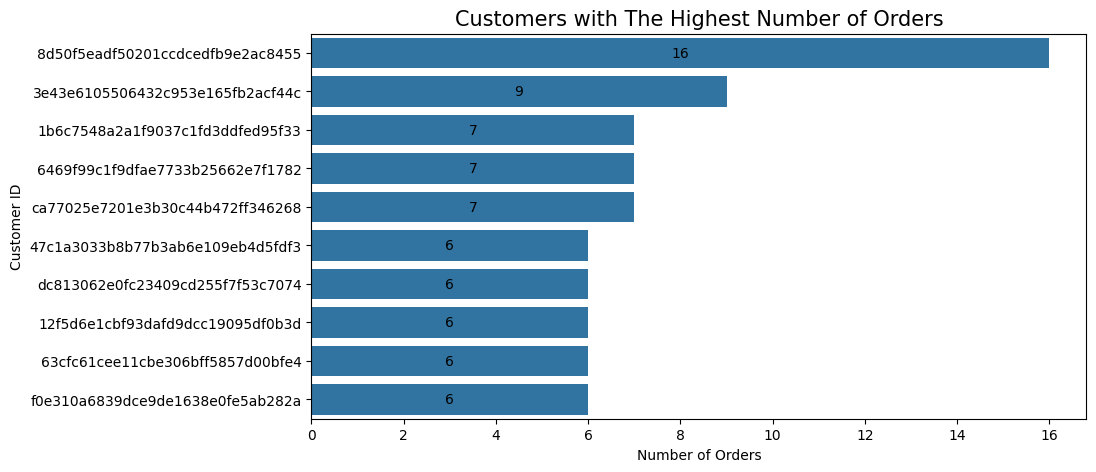

In [62]:
# top customer by number of orders
customers_top_order_df = main_df.groupby('customer_unique_id').agg(
    order_count=('customer_id', 'nunique'),
    revenue=('payment_value', 'sum')).reset_index()

plt.subplots(figsize=(10, 5))
ax = sns.barplot(
    data=customers_top_order_df.sort_values('order_count', ascending=False).reset_index().head(10),
    x='order_count',
    y='customer_unique_id')

ax.set_title('Customers with The Highest Number of Orders', fontsize=15)
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Customer ID')
ax.bar_label(ax.containers[0], label_type='center')

plt.show()

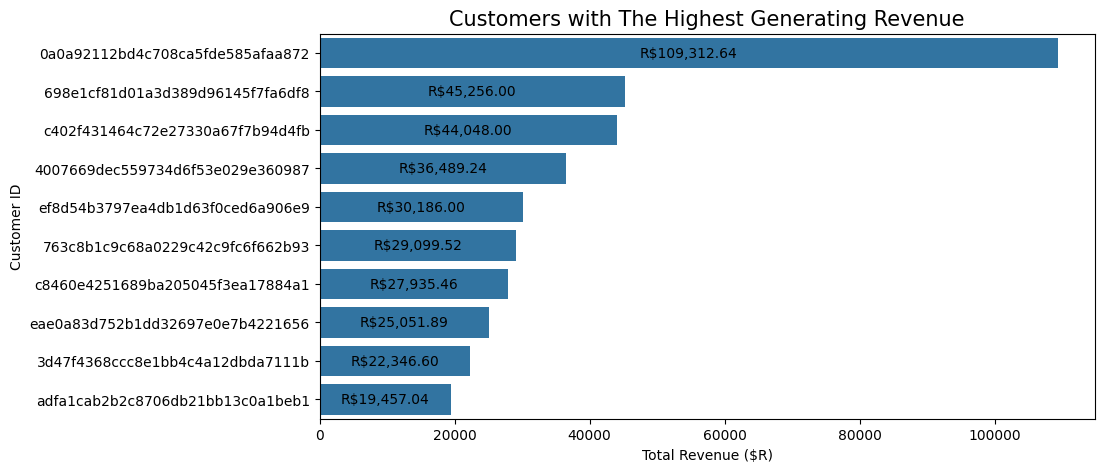

In [63]:
# top customers by generating revenue
plt.subplots(figsize=(10, 5))
ax = sns.barplot(
    data=customers_top_order_df.sort_values('revenue', ascending=False).reset_index().head(10),
    x='revenue',
    y='customer_unique_id')

ax.set_title('Customers with The Highest Generating Revenue', fontsize=15)
ax.set_xlabel('Total Revenue ($R)')
ax.set_ylabel('Customer ID')
ax.bar_label(ax.containers[0], label_type='center', fmt='R${:,.2f}')

plt.show()

Pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455 melakukan order paling banyak, yaitu 16 kali. Sedangkan pelanggan dengan ID 0a0a92112bd4c708ca5fde585afaa872 menghasilkan revenue paling banyak, yaitu sebesar R$109,312.64.

### Pertanyaan 2: Bagaimana persebaran penjual yang dimiliki Olist berdasarkan kota dan negara bagian? Serta penjual manakah yang paling banyak mendapatkan order dan paling banyak menghasilkan revenue?

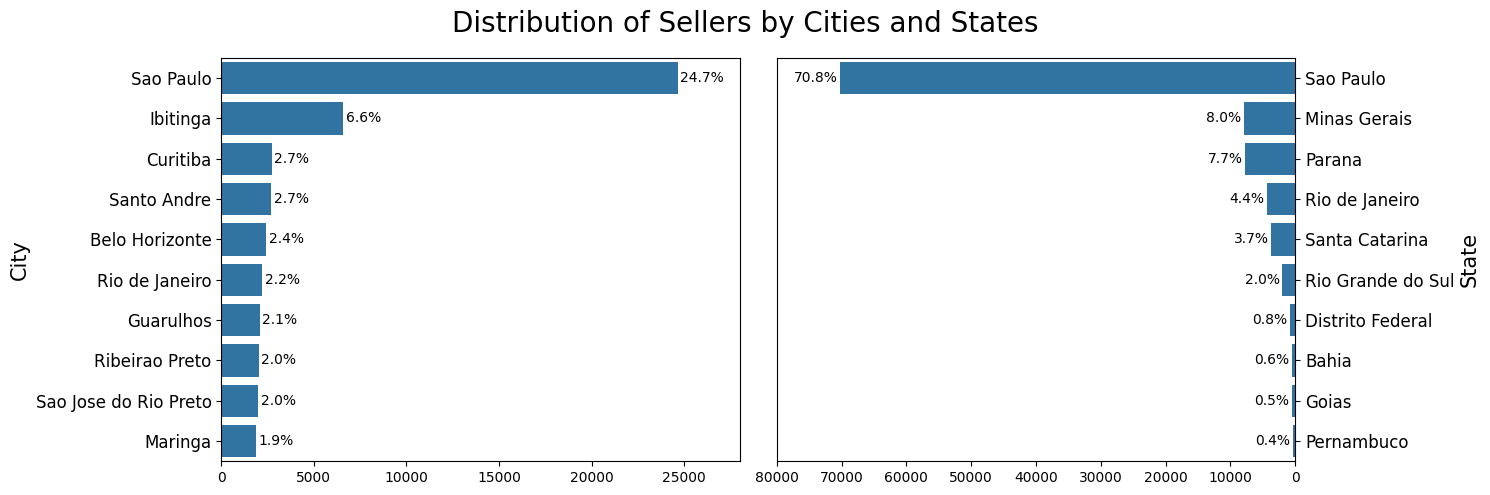

In [64]:
# sellers distribution
sellers_bycity_df = main_df.groupby('seller_city')['order_id'].nunique().reset_index()
sellers_bystate_df = main_df.groupby('seller_state')['order_id'].nunique().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# by city
sns.barplot(
    data=sellers_bycity_df.sort_values('order_id', ascending=False).head(10),
    x='order_id',
    y='seller_city',
    ax=ax[0])

ax[0].set_ylabel('City', fontsize=15)
ax[0].set_xlabel(None)
ax[0].set_xlim(0, 28000)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].bar_label(
    container=ax[0].containers[0],
    padding=2,
    fmt=lambda x: f'{x/sellers_bycity_df.order_id.sum()*100:.1f}%')

# by state
sns.barplot(
    data=sellers_bystate_df.sort_values('order_id', ascending=False).head(10),
    x='order_id',
    y='seller_state',
    ax=ax[1])

ax[1].set_ylabel('State', fontsize=15)
ax[1].set_xlabel(None)
ax[1].set_xlim(0, 80000)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=12)
ax[1].bar_label(
    container=ax[1].containers[0],
    padding=2,
    fmt=lambda x: f'{x/sellers_bystate_df.order_id.sum()*100:.1f}%')

plt.suptitle("Distribution of Sellers by Cities and States", fontsize=20)
plt.tight_layout()
plt.show()

Kota dengan penjual terbanyak berada di Sao Paulo, yaitu sebesar 24.7% dari total seluruh penjual, diikuti oleh Ibitinga (6.6%) dan Curitiba (2.7%). Sedangkan negara bagian dengan penjual terbanyak berada di Sao Paulo, yaitu sebanyak 70.8% dari seluruh penjual, diikuti oleh Minas Gerais (8.0%) dan Parana (7.7%). 

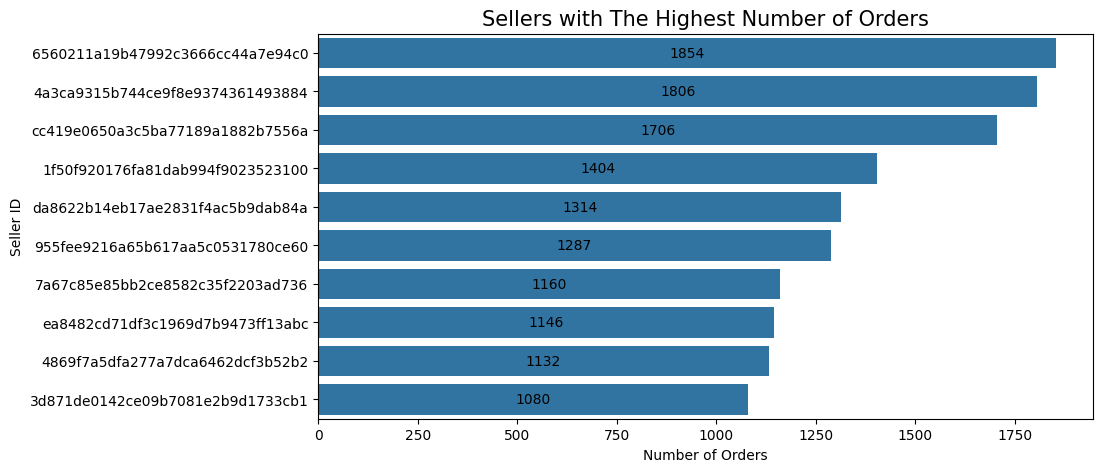

In [65]:
# top sellers by number of orders
sellers_top_order_df = main_df.groupby('seller_id').agg(
    order_count=('order_id', 'nunique'),
    revenue=('payment_value', 'sum')).reset_index()

plt.subplots(figsize=(10, 5))
ax = sns.barplot(
    data=sellers_top_order_df.sort_values('order_count', ascending=False).reset_index().head(10),
    x='order_count',
    y='seller_id')

ax.set_title('Sellers with The Highest Number of Orders', fontsize=15)
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Seller ID')
ax.bar_label(ax.containers[0], label_type='center')

plt.show()

Penjual dengan ID 6560211a19b47992c3666cc44a7e94c0 mendapatkan order paling banyak, yaitu sebanyak 1854 kali.

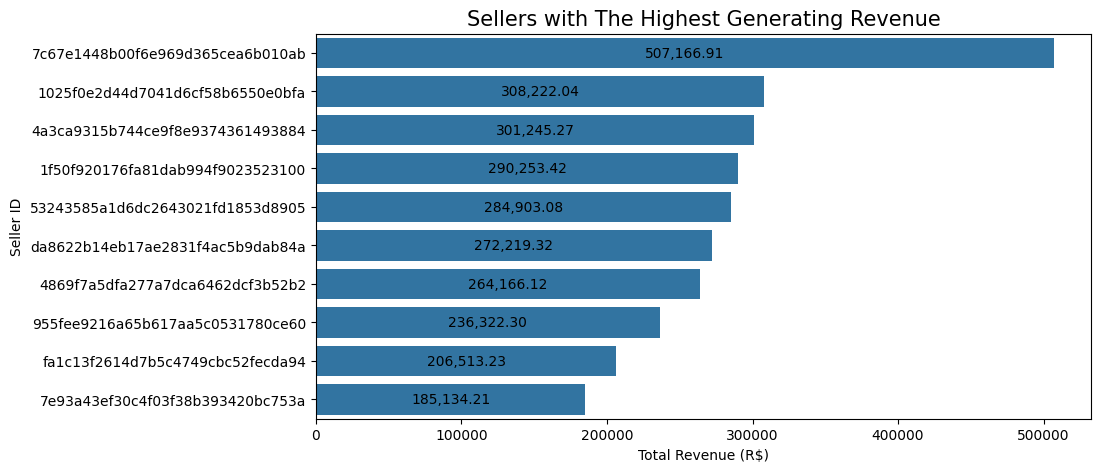

In [66]:
# top sellers by generating revenue
plt.subplots(figsize=(10, 5))
ax = sns.barplot(
    data=sellers_top_order_df.sort_values('revenue', ascending=False).reset_index().head(10),
    x='revenue',
    y='seller_id')

ax.set_title('Sellers with The Highest Generating Revenue', fontsize=15)
ax.set_xlabel('Total Revenue (R$)')
ax.set_ylabel('Seller ID')
ax.bar_label(ax.containers[0], label_type='center', fmt='{:,.2f}')

plt.show()

Penjual dengan ID 7c67e1448b00f6e969d365cea6b010ab menghasilkan revenue paling besar, yaitu sebanyak R$507,166.91.

### Pertanyaan 3: Produk apa yang paling banyak dan paling sedikit terjual dan menghasilkan revenue?

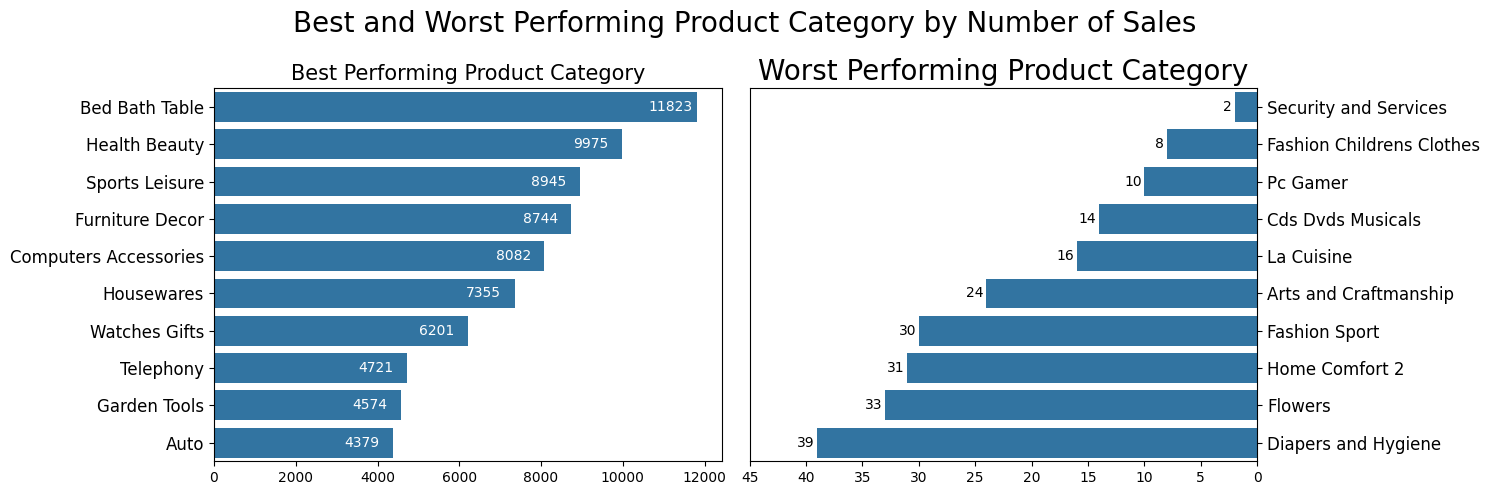

In [67]:
# grouping product by category
product_bycategory_df = main_df.groupby('product_category').agg(
    purchase_count=('order_id', 'count'),
    revenue=('payment_value', 'sum')
).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# best product category by purchase
sns.barplot(
    data=product_bycategory_df.sort_values('purchase_count', ascending=False).head(10),
    x='purchase_count',
    y='product_category',
    ax=ax[0])

ax[0].set_title('Best Performing Product Category', fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].bar_label(ax[0].containers[0], padding=-35, color='white')

# worst product category by purchase
sns.barplot(
    data=product_bycategory_df.sort_values('purchase_count', ascending=True).head(10),
    x='purchase_count',
    y='product_category',
    ax=ax[1])

ax[1].set_title('Worst Performing Product Category', fontsize=20)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_xlim(0, 45)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=12)
ax[1].bar_label(ax[1].containers[0], padding=2)

plt.suptitle("Best and Worst Performing Product Category by Number of Sales", fontsize=20)
plt.tight_layout()
plt.show()

Kategori produk yang paling banyak diorder adalah Bed Bath Table, yaitu sebanyak 11823 kali. Kemudian diikuti oleh kategori Health Beauty (9975 kali) dan Sports Leisure (8945 kali). Sedangkan kategori produk yang paling sedikit diorder adalah Security and Service (2 kali), Fashion Childrens Clothes (8 kali), dan PC Gamer (10 kali).

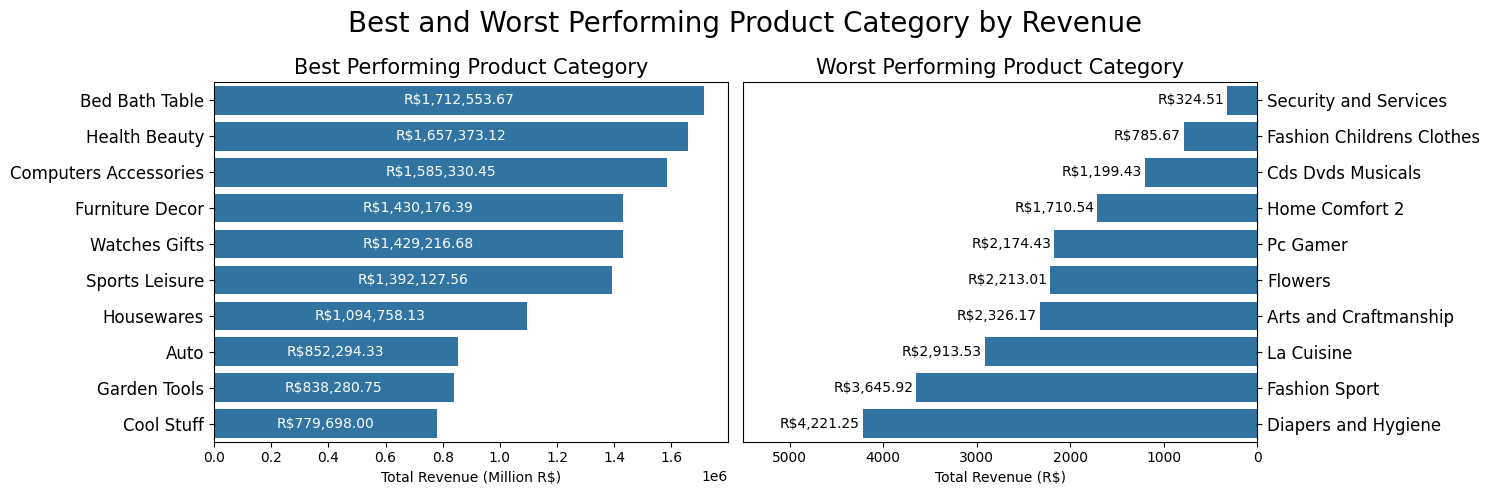

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# best product category by generating revenue
sns.barplot(
    data=product_bycategory_df.sort_values('revenue', ascending=False).head(10),
    x='revenue',
    y='product_category',
    ax=ax[0])

ax[0].set_title('Best Performing Product Category', fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel('Total Revenue (Million R$)')
ax[0].tick_params(axis='y', labelsize=12)
ax[0].bar_label(ax[0].containers[0], label_type='center', fmt='R${:,.2f}', color='white')

# worst product category by generating revenue
sns.barplot(
    data=product_bycategory_df.sort_values('revenue', ascending=True).head(10),
    x='revenue',
    y='product_category',
    ax=ax[1])

ax[1].set_title('Worst Performing Product Category', fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel('Total Revenue (R$)')
ax[1].set_xlim(0, 5500)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=12)
ax[1].bar_label(ax[1].containers[0], padding=2, fmt='R${:,.2f}')

plt.suptitle("Best and Worst Performing Product Category by Revenue", fontsize=20)
plt.tight_layout()
plt.show()

Kategori produk yang paling banyak menghasilkan revenue adalah Bed Bath Table, yaitu sebanyak R$1,712,553.67. Kemudian diikuti oleh kategori Health Beauty dan Computers Accessories. Sedangkan kategori produk yang paling sedikit menghasilkan revenue adalah Security and Service (R$324.51), Fashion Childrens Clothes (R$785.67), dan CDs DVDs Musicals (R$1,199.43).

### Pertanyaan 4: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

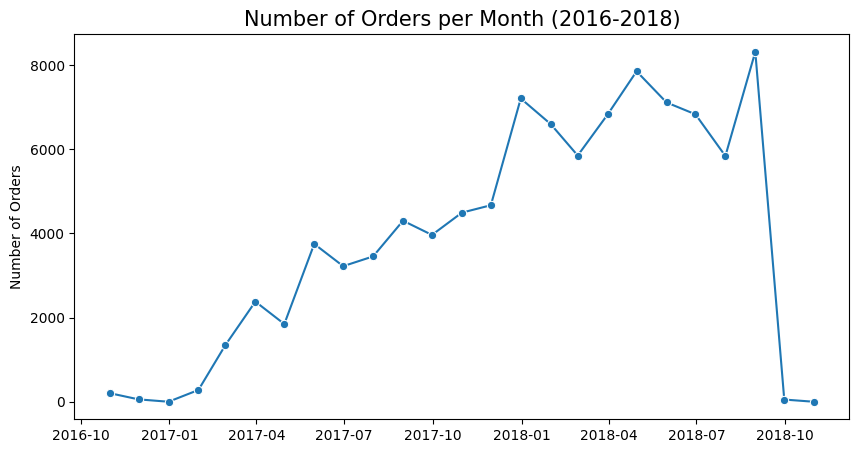

In [69]:
# monthly order
monthly_orders_df = main_df.resample(rule='m', on='order_delivered_customer_date').agg(
    revenue=('payment_value', 'sum'),
    total_order=('order_id', 'nunique')
).reset_index()

plt.subplots(figsize=(10, 5))

sns.lineplot(
    data=monthly_orders_df,
    x='order_delivered_customer_date',
    y='total_order',
    marker='o')

plt.title('Number of Orders per Month (2016-2018)', fontsize=15)
plt.xlabel(None)
plt.ylabel('Number of Orders')

plt.show()

Trend jumlah order bulanan dari Oktober 2016 sampai September 2018 cenderung meningkat dengan puncaknya berada di September 2018. Pada beberapa bulan tertentu, jumlah order mengalami penurunan secara signifikan, seperti pada Mei 2017, Februari-Maret 2018, dan Juni-Agustus 2018.

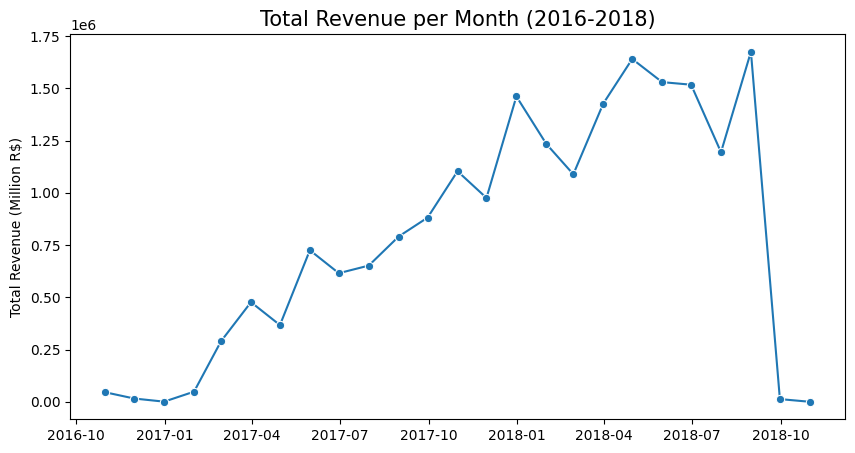

In [70]:
# monthly total revenue
plt.subplots(figsize=(10, 5))

sns.lineplot(
    data=monthly_orders_df,
    x='order_delivered_customer_date',
    y='revenue',
    marker='o')

plt.title('Total Revenue per Month (2016-2018)', fontsize=15)
plt.xlabel(None)
plt.ylabel('Total Revenue (Million R$)')

plt.show()

Trend total revenue bulanan dari Oktober 2016 sampai September 2018 cenderung meningkat sama seperti trend peningkatan jumlah order bulanannya.

### Pertanyaan 5: Bagaimana segmentasi pelanggan berdasarkan order terakhir (<em>Recency</em>), frekuensi order (<em>Frequency</em>), dan jumlah revenue yang dihasilkan (<em>Monetary</em>)?

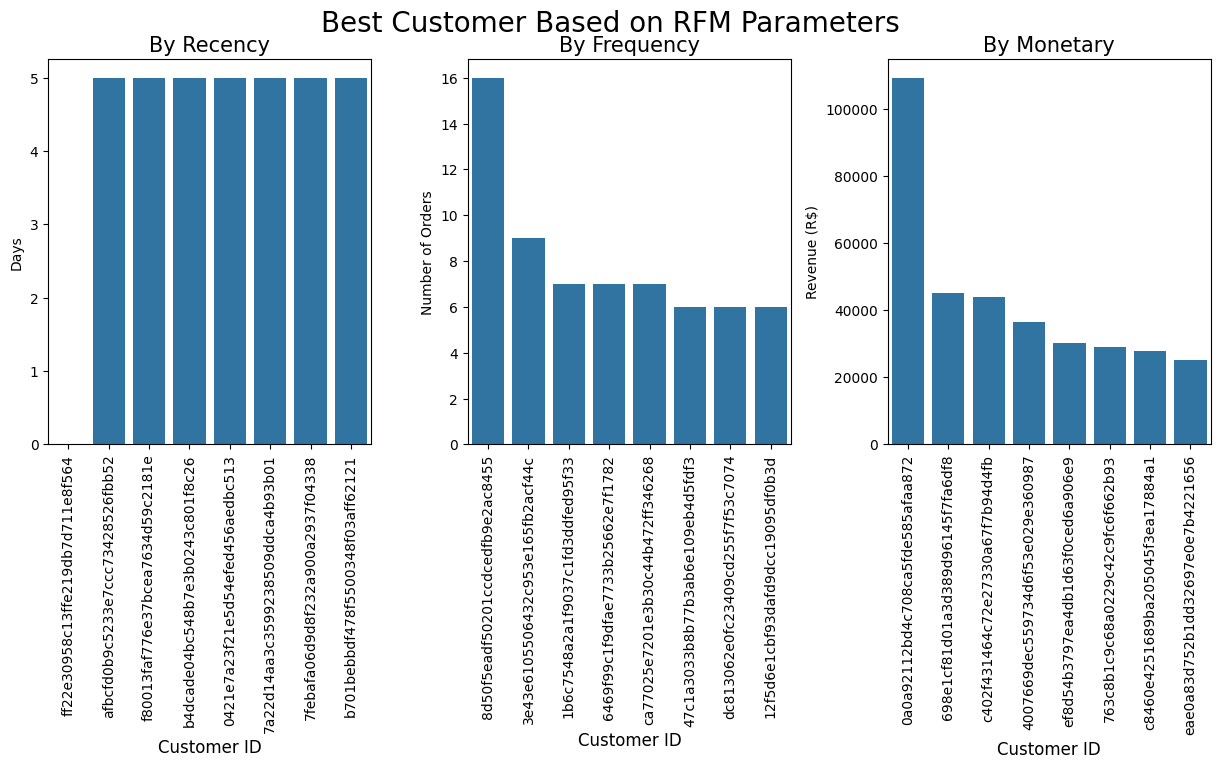

In [71]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(
    data=rfm_df.sort_values('recency').head(8),
    x='customer_unique_id',
    y='recency',
    ax=ax[0])

sns.barplot(
    data=rfm_df.sort_values('frequency', ascending=False).head(8),
    x='customer_unique_id',
    y='frequency',
    ax=ax[1])

sns.barplot(
    data=rfm_df.sort_values('monetary', ascending=False).head(8),
    x='customer_unique_id',
    y='monetary',
    ax=ax[2])

ax[0].set_title("By Recency", loc="center", fontsize=15)
ax[1].set_title("By Frequency", loc="center", fontsize=15)
ax[2].set_title("By Monetary", loc="center", fontsize=15)
for i in range(3):
    ax[i].set_xlabel('Customer ID', fontsize=12)
    ax[i].tick_params(axis='x', labelrotation=90)
ax[0].set_ylabel('Days')
ax[1].set_ylabel('Number of Orders')
ax[2].set_ylabel('Revenue (R$)')

plt.suptitle("Best Customer Based on RFM Parameters", fontsize=20)
plt.subplots_adjust(wspace=0.3)
plt.show()

Pelanggan terbaik berdasarkan order terakhir adalah pelanggan dengan ID ff22e30958c13ffe219db7d711e8f564. Pelanggan terbaik berdasarkan frekuensi order adalah pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455 (16 kali order). Pelanggan terbaik berdasarkan jumlah revenue yang dihasilkan adalah pelanggan dengan ID 0a0a92112bd4c708ca5fde585afaa872 (R$109,312.64). 

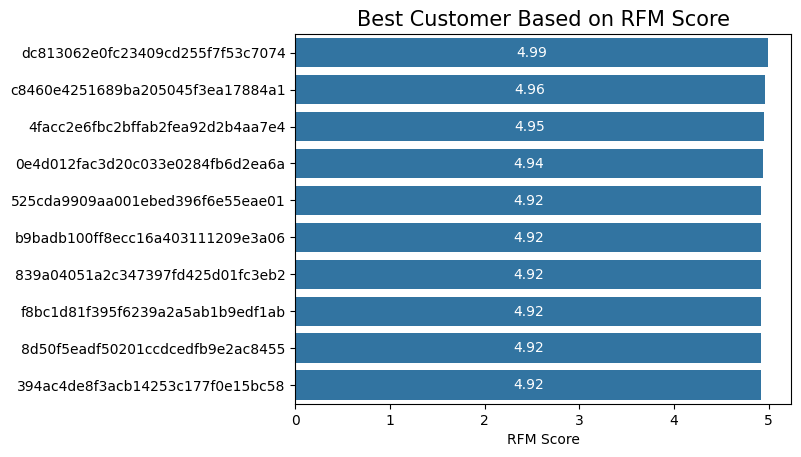

In [72]:
# best customer by RFM score
ax = sns.barplot(
    data=rfm_df.sort_values('RFM_score', ascending=False).head(10),
    x='RFM_score',
    y='customer_unique_id')

ax.set_title('Best Customer Based on RFM Score', fontsize=15)
ax.set_xlabel('RFM Score')
ax.set_ylabel(None)
ax.bar_label(ax.containers[0], label_type='center', color='white')

plt.show()

Secara keseluruhan, pelanggan terbaik berdasarkan skor RFMnya adalah pelanggan dengan ID dc813062e0fc23409cd255f7f53c7074.

## Conclusion

1. Bagaimana persebaran pelanggan yang dimiliki Olist berdasarkan kota dan negara bagian?
<blockquote>
Kota dengan pelanggan paling banyak adalah Sao Paulo, yaitu sebanyak 15.6% dari seluruh pelanggan, dan diikuti oleh Rio de Janeiro (6.9%) dan Belo Horizonte (2.8%). Sedangkan negara bagian dengan pelanggan terbanyak berada di Sao Paulo, yaitu sebanyak 41.9% dari seluruh pelanggan, selanjutnya diikuti oleh Rio de Janeiro (12.9%) dan Minas Gerais (11.7%).
</blockquote>

2. Bagaimana persebaran penjual yang dimiliki Olist berdasarkan kota dan negara bagian? Serta penjual manakah yang paling banyak mendapatkan order dan paling banyak menghasilkan revenue?
<blockquote>
Kota dengan penjual terbanyak berada di Sao Paulo, yaitu sebesar 24.7% dari total seluruh penjual, diikuti oleh Ibitinga (6.6%) dan Curitiba (2.7%). Sedangkan negara bagian dengan penjual terbanyak berada di Sao Paulo, yaitu sebanyak 70.8% dari seluruh penjual, diikuti oleh Minas Gerais (8.0%) dan Parana (7.7%). Penjual dengan ID 6560211a19b47992c3666cc44a7e94c0 mendapatkan order paling banyak, yaitu sebanyak 1854 kali. Sedangkan penjual dengan ID 7c67e1448b00f6e969d365cea6b010ab menghasilkan revenue paling besar, yaitu sebanyak R$507,166.91.
</blockquote>

3. Produk apa yang paling banyak dan paling sedikit terjual dan menghasilkan revenue?
<blockquote>
Kategori produk yang paling banyak diorder adalah Bed Bath Table, yaitu sebanyak 11823 kali. Kemudian diikuti oleh kategori Health Beauty (9975 kali) dan Sports Leisure (8945 kali). Sedangkan kategori produk yang paling sedikit diorder adalah Security and Service (2 kali), Fashion Childrens Clothes (8 kali), dan PC Gamer (10 kali). Selain itu, kategori produk yang paling banyak menghasilkan revenue adalah Bed Bath Table, yaitu sebanyak R$1,712,553.67. Kemudian diikuti oleh kategori Health Beauty dan Computers Accessories. Sedangkan kategori produk yang paling sedikit menghasilkan revenue adalah Security and Service (R$324.51), Fashion Childrens Clothes (R$785.67), dan CDs DVDs Musicals (R$1,199.43).
</blockquote>

4. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
<blockquote>
Trend jumlah order dari Oktober 2016 sampai September 2018 cenderung meningkat dengan puncaknya berada di September 2018. Pada beberapa bulan tertentu, jumlah order mengalami penurunan secara signifikan, seperti pada Mei 2017, Februari-Maret 2018, dan Juni-Agustus 2018. Trend total revenue bulanan yang diperoleh dari Oktober 2016 sampai September 2018 cenderung meningkat sama seperti trend peningkatan jumlah order bulanannya.
</blockquote>

5. Bagaimana segmentasi pelanggan berdasarkan order terakhir (<em>Recency</em>), frekuensi order (<em>Frequency</em>), dan jumlah revenue yang dihasilkan (<em>Monetary</em>)?
<blockquote>
Pelanggan terbaik berdasarkan skor RFM yang paling tinggi adalah pelanggan dengan ID dc813062e0fc23409cd255f7f53c7074. Kemudian pelanggan disegmentasikan berdasarkan kapan terakhir order, frekuensi order, dan jumlah revenue yang dihasilkan menjadi empat segmen. Kelompok `Top Customers` merupakan kelompok pelanggan dengan RFM score tertinggi (Top 10%), diikuti oleh `High Value Customers` (Top 25%) dan `Medium Value Customers` (Top 75%) serta sisanya termasuk ke dalam `Low Value Customers`
</blockquote>
